**Karthik Raj R | 20BCE1420**

In [ ]:
import os
import logging

import pandas as pd
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv(('/content/drive/MyDrive/ML-J comp/train_MachineLearningCVE.csv'), skipinitialspace=True)
logging.info("Class distribution\n{}".format(df_train.Label.value_counts()))
df_test = pd.read_csv(('/content/drive/MyDrive/ML-J comp/test_MachineLearningCVE.csv'), skipinitialspace=True)
logging.info("Class distribution\n{}".format(df_test.Label.value_counts()))

In [ ]:
#import torch
#torch.manual_seed(12524254236733923457)

#Exploring the Dataset


In [ ]:
df_train.Label.unique()

array([ 0, 10,  4,  7,  3,  5,  6, 11,  1, 12, 14,  9,  8, 13,  2])

In [ ]:
df_test.Label.unique()

array([ 0,  4, 10,  3,  7,  6,  5, 11, 12,  1, 14,  9,  8, 13,  2])

In [ ]:
df_train.Label.value_counts()

0     1818477
4      184858
10     127144
2      102421
3        8234
7        6350
11       4718
6        4637
5        4399
1        1573
12       1206
14        522
9          29
13         17
8           9
Name: Label, dtype: int64

In [ ]:
df_test.Label.value_counts()

0     454620
4      46215
10     31786
2      25606
3       2059
7       1588
11      1179
6       1159
5       1100
1        393
12       301
14       130
9          7
13         4
8          2
Name: Label, dtype: int64

***All attributes of the dataset are continuous***

#Feature selection

In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler

Xf, Yf = df_train.iloc[:,0:77], df_train.iloc[:,78]
fs = SelectKBest(score_func=f_classif, k=70)
X_selected = fs.fit_transform(Xf,Yf)

# Scale the features between 0 ~ 1
scaler = MinMaxScaler()
X_selected = scaler.fit_transform(X_selected)

print(X_selected.shape)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [31 33 56 57 58 59 60 61] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(2264594, 70)


In [ ]:
Xf_test, Yf_test = df_test.iloc[:,0:77], df_test.iloc[:,78]
fs_test = SelectKBest(score_func=f_classif, k=70)
X_stest = fs_test.fit_transform(Xf_test, Yf_test)
# Scale the features between 0 ~ 1
scaler = MinMaxScaler()
X_stest = scaler.fit_transform(X_stest)
print(X_stest.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [31 33 56 57 58 59 60 61] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(566149, 70)


In [ ]:
df_train = pd.DataFrame(X_selected)
print(df_train.iloc[:,69].value_counts())

0.000000    1810736
0.083333      73878
0.085000      17300
0.833333       7862
0.490833       6618
             ...   
0.557978          1
0.044248          1
0.082406          1
0.056717          1
0.063009          1
Name: 69, Length: 122331, dtype: int64


In [ ]:
df_train['Label'] = Yf

In [ ]:
df_test = pd.DataFrame(X_stest)
df_test['Label'] = Yf_test

In [ ]:
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

#Dealing with class imbalance using SMOTE and random undersampling

###As observed in the paper:

Class lablel 0 = benign

Class label other than 0 = 1(intrusion)

Class=0, n=1818477 (80.300%)
Class=10, n=127144 (5.614%)
Class=4, n=184858 (8.163%)
Class=7, n=6350 (0.280%)
Class=3, n=8234 (0.364%)
Class=5, n=4399 (0.194%)
Class=6, n=4637 (0.205%)
Class=11, n=4718 (0.208%)
Class=1, n=1573 (0.069%)
Class=12, n=1206 (0.053%)
Class=14, n=522 (0.023%)
Class=9, n=29 (0.001%)
Class=8, n=9 (0.000%)
Class=13, n=17 (0.001%)
Class=2, n=102421 (4.523%)


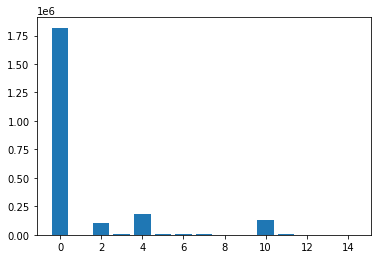

In [ ]:
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

x, y = df_train.iloc[:,0:70], df_train.iloc[:,70]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=454620 (80.300%)
Class=4, n=46215 (8.163%)
Class=10, n=31786 (5.614%)
Class=3, n=2059 (0.364%)
Class=7, n=1588 (0.280%)
Class=6, n=1159 (0.205%)
Class=5, n=1100 (0.194%)
Class=11, n=1179 (0.208%)
Class=12, n=301 (0.053%)
Class=1, n=393 (0.069%)
Class=14, n=130 (0.023%)
Class=9, n=7 (0.001%)
Class=8, n=2 (0.000%)
Class=13, n=4 (0.001%)
Class=2, n=25606 (4.523%)


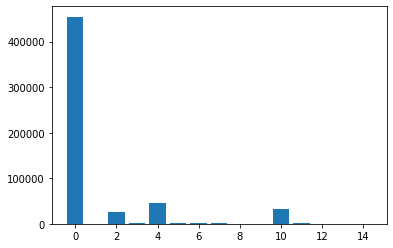

In [ ]:
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

xt, yt = df_test.iloc[:,0:70], df_test.iloc[:,70]
# label encode the target variable
yt = LabelEncoder().fit_transform(yt)
# summarize distribution
counter = Counter(yt)
for k,v in counter.items():
	per = v / len(yt) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

###Undersampling class 0
The CICIDS dataset contains 83% of the total
sample strength as benign data.
We are undersampling Class 0 to 10000 and each intrusion to 5000.
Therefore in a single task we have: 20000 elements with 10000 being benign data.


###Training data:

Class=0, n=10000 (12.500%)
Class=1, n=5000 (6.250%)
Class=2, n=5000 (6.250%)
Class=3, n=5000 (6.250%)
Class=4, n=5000 (6.250%)
Class=5, n=5000 (6.250%)
Class=6, n=5000 (6.250%)
Class=7, n=5000 (6.250%)
Class=8, n=5000 (6.250%)
Class=9, n=5000 (6.250%)
Class=10, n=5000 (6.250%)
Class=11, n=5000 (6.250%)
Class=12, n=5000 (6.250%)
Class=13, n=5000 (6.250%)
Class=14, n=5000 (6.250%)


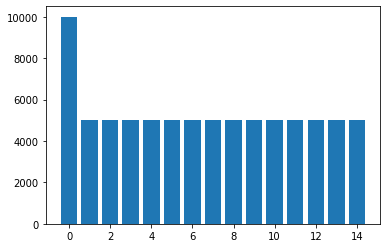

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


'''
Class=0, n=1818477 (80.300%)
Class=10, n=127144 (5.614%)
Class=4, n=184858 (8.163%)
Class=7, n=6350 (0.280%)
Class=3, n=8234 (0.364%)
Class=5, n=4399 (0.194%)
Class=6, n=4637 (0.205%)
Class=11, n=4718 (0.208%)
Class=1, n=1573 (0.069%)
Class=12, n=1206 (0.053%)
Class=14, n=522 (0.023%)
Class=9, n=29 (0.001%)
Class=8, n=9 (0.000%)
Class=13, n=17 (0.001%)
Class=2, n=102421 (4.523%)
'''


#Using pipeline
ostrategy = {12:5000,14:5000,9:5000,8:5000,13:5000,5:5000,6:5000,11:5000,1:5000}
ustrategy = {0:10000,10:5000,4:5000,7:5000,3:5000,2:5000}

over = SMOTE(sampling_strategy=ostrategy)
under = RandomUnderSampler(sampling_strategy=ustrategy)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
x, y = pipeline.fit_resample(x, y)




# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
dataf = x
dataf['Label'] = y
print(dataf.Label.value_counts())

0     10000
1      5000
2      5000
3      5000
4      5000
5      5000
6      5000
7      5000
8      5000
9      5000
10     5000
11     5000
12     5000
13     5000
14     5000
Name: Label, dtype: int64


In [ ]:
#random shuffling
dataf = dataf.sample(frac=1)

###Testing data:

Class=0, n=2000 (12.500%)
Class=1, n=1000 (6.250%)
Class=2, n=1000 (6.250%)
Class=3, n=1000 (6.250%)
Class=4, n=1000 (6.250%)
Class=5, n=1000 (6.250%)
Class=6, n=1000 (6.250%)
Class=7, n=1000 (6.250%)
Class=8, n=1000 (6.250%)
Class=9, n=1000 (6.250%)
Class=10, n=1000 (6.250%)
Class=11, n=1000 (6.250%)
Class=12, n=1000 (6.250%)
Class=13, n=1000 (6.250%)
Class=14, n=1000 (6.250%)


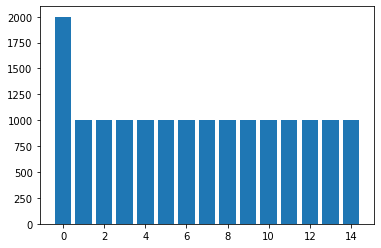

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


ostrategy = {14:1000,9:1000,8:1000,13:1000,1:1000,12:1000}
ustrategy = {0:2000,10:1000,4:1000,7:1000,3:1000,6:1000,5:1000,11:1000,2:1000}
over = SMOTE(sampling_strategy=ostrategy,k_neighbors=1)
under = RandomUnderSampler(sampling_strategy=ustrategy)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
xt, yt = pipeline.fit_resample(xt, yt)



# summarize distribution
counter = Counter(yt)
for k,v in counter.items():
	per = v / len(yt) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
dataf_test = xt
dataf_test['Label'] = yt
print(dataf_test.Label.value_counts())

0     2000
1     1000
2     1000
3     1000
4     1000
5     1000
6     1000
7     1000
8     1000
9     1000
10    1000
11    1000
12    1000
13    1000
14    1000
Name: Label, dtype: int64


In [ ]:
#random shuffling
dataf_test = dataf_test.sample(frac=1)

#Implementing task division and creating data loader

In [ ]:
#Creating the taskset 
def taskset_dil(n):
  import random
  d = {}
  l = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
  task_list = []
  for i in range(n):
    choosing = random.sample(l,2)
    choosing.append(0)
    #print(choosing)
    res = [i for i in l if i not in choosing]
    l = res
    #print(l)
    task_list.append(choosing)
  return task_list

In [ ]:
def taskset_cil(n,p):
  import random
  d = {}
  orig = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
  l = orig
  task_perm = {}
  task_list = []
  for j in range(p):
    task_list = []
    for i in range(n):
      if(i==j):
        choosing = random.sample(l,2)
        choosing.append(0)
      else:
        choosing = random.sample(l,3)
      #print(choosing)
      res = [i for i in l if i not in choosing]
      l = res
      #print(l)
      task_list.append(choosing)
    task_perm[j] = task_list
    l = orig
  return task_perm

In [ ]:
class MyDataset():
 
  def __init__(self,data,target,train):
    if(train):
      x = data.values
      y = target.values
      self.x_train=torch.tensor(x,dtype=torch.float32)
      self.y_train=torch.tensor(y,dtype=torch.float32)
    else:
      x = data.values
      y = target.values
      self.x_train=torch.tensor(x,dtype=torch.float32)
      self.y_train=torch.tensor(y,dtype=torch.float32)
  def __len__(self):
    return len(self.y_train)
   
  def __getitem__(self,idx):
    return self.x_train[idx],self.y_train[idx]
  
  def get_sample(self, sample_size):
    sample_idx = random.sample(range(len(self)), sample_size)
    return [data for data in self.x_train[sample_idx]]

##Task division





In [ ]:
num_tasks = 5
num_perm = 5
task_list_dil = taskset_dil(num_tasks)
print(task_list_dil)
task_list_cil = taskset_cil(num_tasks,num_perm)
print(task_list_cil)

[[7, 13, 0], [12, 5, 0], [4, 2, 0], [8, 6, 0], [10, 9, 0]]
{0: [[9, 13, 0], [2, 1, 12], [10, 7, 8], [11, 6, 3], [5, 14, 4]], 1: [[13, 11, 3], [10, 9, 0], [7, 8, 5], [2, 14, 4], [12, 6, 1]], 2: [[2, 11, 6], [14, 12, 13], [3, 1, 0], [5, 7, 9], [10, 4, 8]], 3: [[12, 4, 10], [14, 7, 9], [3, 6, 13], [5, 11, 0], [8, 1, 2]], 4: [[12, 8, 1], [2, 4, 3], [10, 14, 11], [5, 6, 7], [13, 9, 0]]}


In [ ]:
#Transforming the data to the form of tasks
df_task = {}
for i in range(5):
  df_task[i] = dataf.loc[dataf['Label'].isin(task_list_dil[i])]

#Transforming the test data to the form of tasks
dftest_task = {}
for i in range(5):
  dftest_task[i] = dataf_test.loc[dataf_test['Label'].isin(task_list_dil[i])]


In [ ]:
for i in range(5):
  #random shuffling
  df_task[i] = df_task[i].sample(frac=1)

In [ ]:
for i in range(5):
  #random shuffling
  dftest_task[i] = dftest_task[i].sample(frac=1)

###Class incremental setting:
In class incremental setting we further create 5 different permutations of the list of lists with each permutation having 5 tasks with the added restriction of only one task having benign data in a given permutation.

In [ ]:
#Transforming the training data to the form of tasks
permutation = {}
df_task_cil = {}
df_temp = {}
for j in range(num_perm):
  for i in range(5):
    df_task_cil[i] = dataf.loc[dataf['Label'].isin(task_list_cil[j][i])]
  permutation[j] = df_task
  df_task_cil = {}




#Transforming the test data to the form of tasks
permutation_test = {}
dftest_task_cil = {}
dftest_temp = []
for j in range(5):
  for i in range(5):
    dftest_task_cil[i] = dataf_test.loc[dataf_test['Label'].isin(task_list_cil[j][i])]
  permutation_test[j] = df_task
  df_task_cil = {}

In [ ]:
permutation[0]

{0:               0             1         2         3         4             5  \
 41670  0.000320  7.490719e-02  0.000036  0.000051  0.000007  2.868245e-07   
 3993   0.001221  4.494703e-02  0.000009  0.000003  0.000000  0.000000e+00   
 44878  0.000320  3.333333e-08  0.000005  0.000000  0.000001  0.000000e+00   
 2960   0.799741  2.500000e-08  0.000005  0.000000  0.000003  0.000000e+00   
 7355   0.006760  4.408958e-02  0.000059  0.000038  0.000030  1.105800e-05   
 ...         ...           ...       ...       ...       ...           ...   
 42402  0.000320  7.851093e-02  0.000036  0.000051  0.000008  2.868245e-07   
 73171  0.001221  4.181806e-02  0.000014  0.000014  0.000045  3.004385e-06   
 44273  0.000320  3.333333e-08  0.000005  0.000000  0.000001  0.000000e+00   
 72253  0.001221  4.177008e-02  0.000018  0.000015  0.000046  5.088183e-06   
 9790   0.000809  1.658333e-06  0.000005  0.000007  0.000006  2.227467e-07   
 
               6         7         8         9  ...        

####As observed in the paper:

Class lablel 0 = benign

Class label other than 0 = 1(intrusion)

Replacing labels other than 0 as 1

In [ ]:
for i in range(5):
  df_task[i].loc[df_task[i]["Label"] != 0 , "Label"] = 1

for i in range(5):
  dftest_task[i].loc[dftest_task[i]["Label"] != 0 , "Label"] = 1

In [ ]:
print(df_task[0]["Label"].value_counts())
print(dftest_task[0]["Label"].value_counts())

1    10000
0    10000
Name: Label, dtype: int64
0    2000
1    2000
Name: Label, dtype: int64


In [ ]:
for j in range(num_perm):
  for i in range(5):
    permutation[j][i].loc[permutation[j][i]["Label"] != 0 , "Label"] = 1

for j in range(num_perm):
  for i in range(5):
    permutation_test[j][i].loc[permutation_test[j][i]["Label"] != 0 , "Label"] = 1

In [ ]:
print(permutation[0][0]["Label"].value_counts())
print(permutation_test[0][0]["Label"].value_counts())

1    10000
0    10000
Name: Label, dtype: int64
1    10000
0    10000
Name: Label, dtype: int64


In [ ]:
print(df_task[0].iloc[:,62].value_counts())

0.231884    14335
0.144928     5086
0.173913      288
0.289855      225
0.318841       36
0.202899       16
0.000000       10
0.347826        2
0.434783        1
0.260870        1
Name: 62, dtype: int64


##Data loader:

###Domain incremental setting

In [ ]:
import torch
batch_size = 128

datas = {}
lbl = {}
datas_test = {}
lbl_test = {}
obj_dt = {}
train_loader = {}
test_loader = {}
for i in range(5):
  datas[i], lbl[i] = df_task[i].iloc[:,0:70], df_task[i].iloc[:,70]
  datas_test[i], lbl_test[i] = dftest_task[i].iloc[:,0:70], dftest_task[i].iloc[:,70]
  train_loader[i] = torch.utils.data.DataLoader(MyDataset(data=datas[i],target=lbl[i],train=True),
                                                      batch_size=batch_size,
                                                      num_workers=2)
  test_loader[i] = torch.utils.data.DataLoader(MyDataset(datas_test[i],lbl_test[i],train=False),
                                                     batch_size=batch_size)


###Class incremental setting

In [ ]:
import torch
batch_size = 128

datas = {}
lbl = {}
datas_test = {}
lbl_test = {}
obj_dt = {}
train_temp = {}
test_temp = {}
train_loader_cil = {}
test_loader_cil = {}
train_loader_perm = {}
test_loader_perm = {}
k = 0
l = 0

for j in range(num_perm):
  for i in range(5):
    datas[i], lbl[i] = permutation[j][i].iloc[:,0:70], permutation_test[j][i].iloc[:,70]
    datas_test[i], lbl_test[i] = permutation_test[j][i].iloc[:,0:70], permutation_test[j][i].iloc[:,70]
    train_loader_cil[k] = torch.utils.data.DataLoader(MyDataset(data=datas[i],target=lbl[i],train=True),
                                                      batch_size=batch_size,
                                                      num_workers=2)
    test_loader_cil[l] = torch.utils.data.DataLoader(MyDataset(datas_test[i],lbl_test[i],train=False),
                                                     batch_size=batch_size)
    l += 1
    k += 1

#Training the model

In [ ]:
import random
import torch
from torchvision import datasets
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")
import random
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from tqdm import tqdm


In [ ]:
from copy import deepcopy

import torch
from torch import nn
from torch.nn import functional as F
from torch.autograd import Variable
import torch.utils.data

In [ ]:
def variable(t: torch.Tensor, use_cuda=True, **kwargs):
    if torch.cuda.is_available() and use_cuda:
        t = t.cuda()
    return Variable(t, **kwargs)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

##EWC object


In [ ]:
class EWC(object):
    def __init__(self, model: nn.Module, dataset: list):

        self.model = model
        self.dataset = dataset

        self.params = {n: p for n, p in self.model.named_parameters() if p.requires_grad}
        self._means = {}
        self._precision_matrices = self._diag_fisher()

        for n, p in deepcopy(self.params).items():
            self._means[n] = variable(p.data)

    def _diag_fisher(self):
        precision_matrices = {}
        for n, p in deepcopy(self.params).items():
            p.data.zero_()
            precision_matrices[n] = variable(p.data)

        self.model.eval()
        for input in self.dataset:
            self.model.zero_grad()
            input = variable(input)
            output = self.model(input).view(1, -1)
            label = output.max(1)[1].view(-1)
            loss = F.nll_loss(F.log_softmax(output, dim=1), label)
            loss.backward()

            for n, p in self.model.named_parameters():
                precision_matrices[n].data += p.grad.data ** 2 / len(self.dataset)

        precision_matrices = {n: p for n, p in precision_matrices.items()}
        return precision_matrices

    def penalty(self, model: nn.Module):
        loss = 0
        for n, p in model.named_parameters():
            _loss = self._precision_matrices[n] * (p - self._means[n]) ** 2
            loss += _loss.sum()
        return loss

##Training step

In [ ]:
def normal_train(model: nn.Module, optimizer: torch.optim, data_loader: torch.utils.data.DataLoader):
    model.train()
    epoch_loss = 0
    epoch_acc = 0
    epoch_prec = 0
    epoch_recall = 0
    epoch_f1 = 0
    for input, target in data_loader:
        input, target = variable(input), variable(target)
        optimizer.zero_grad()
        output = model(input)
        target = target.type(torch.LongTensor)
        
        loss = F.cross_entropy(output, target)
        pred = F.softmax(output, dim=1).max(dim=1)[1]
        epoch_acc += accuracy_score(target,pred)
        epoch_prec += precision_score(target,pred,zero_division = 0,labels=np.unique(pred))
        epoch_recall += recall_score(target,pred,zero_division = 0,labels=np.unique(pred))
        epoch_f1 += f1_score(target,pred,zero_division = 0,labels=np.unique(pred))
        #epoch_acc += (F.softmax(output, dim=1).max(dim=1)[1] == target).data.sum()
        epoch_loss += loss.data
        loss.backward()
        optimizer.step()
    return epoch_loss / len(data_loader),epoch_acc/len(data_loader),epoch_prec/len(data_loader),epoch_recall/len(data_loader),epoch_f1/len(data_loader)


def ewc_train(model: nn.Module, optimizer: torch.optim, data_loader: torch.utils.data.DataLoader,
              ewc: EWC, importance: float):
    model.train()
    epoch_loss = 0
    epoch_acc = 0
    epoch_prec = 0
    epoch_recall = 0
    epoch_f1 = 0
    for input, target in data_loader:
        input, target = variable(input), variable(target)
        optimizer.zero_grad()
        output = model(input)
        target = target.type(torch.LongTensor)

        loss = F.cross_entropy(output, target) + importance * ewc.penalty(model)
        pred = F.softmax(output, dim=1).max(dim=1)[1]
        epoch_acc += accuracy_score(target,pred)
        epoch_prec += precision_score(target,pred,zero_division = 0,labels=np.unique(pred))
        epoch_recall += recall_score(target,pred,zero_division = 0,labels=np.unique(pred))
        epoch_f1 += f1_score(target,pred,zero_division = 0,labels=np.unique(pred))
        
        epoch_loss += loss.data
        loss.backward()
        optimizer.step()
    
    return epoch_loss / len(data_loader),epoch_acc/len(data_loader),epoch_prec/len(data_loader),epoch_recall/len(data_loader),epoch_f1/len(data_loader)


def gem_train(model: nn.Module, optimizer: torch.optim, data_loader: torch.utils.data.DataLoader,old_tasks,prev_loss):
    model.train()
    ep_l = 0
    epoch_loss = 0
    epoch_acc = 0
    epoch_prec = 0
    epoch_recall = 0
    epoch_f1 = 0
    for ip in old_tasks:
          ip = variable(ip)
          op = model(ip).view(1, -1)
          label = op.max(1)[1].view(-1)
          l = F.nll_loss(F.log_softmax(op, dim=1), label)
          ep_l += l.data
          ep_l = ep_l/len(ip)
          ep_l = ep_l/100
    for input, target in data_loader:
        input, target = variable(input), variable(target)
        #print(optimizer)
        optimizer.zero_grad()
        #print(optimizer)
        output = model(input)
        target = target.type(torch.LongTensor)
        loss = F.cross_entropy(output, target) + ep_l
        
        
        
        
        pred = F.softmax(output, dim=1).max(dim=1)[1]
        epoch_acc += accuracy_score(target,pred)
        epoch_prec += precision_score(target,pred,zero_division = 0,labels=np.unique(pred))
        epoch_recall += recall_score(target,pred,zero_division = 0,labels=np.unique(pred))
        epoch_f1 += f1_score(target,pred,zero_division = 0,labels=np.unique(pred))
        epoch_loss += loss.data
        loss.backward()
        optimizer.step()
        
        
         
    #print(epoch_prec/len(data_loader),epoch_recall/len(data_loader),epoch_f1/len(data_loader))
    return epoch_loss / len(data_loader),epoch_acc/len(data_loader),epoch_prec/len(data_loader),epoch_recall/len(data_loader),epoch_f1/len(data_loader)


def test(model: nn.Module, data_loader: torch.utils.data.DataLoader):
    model.eval()
    correct = 0
    for input, target in data_loader:
        input, target = variable(input), variable(target)
        output = model(input)
        correct += (F.softmax(output, dim=1).max(dim=1)[1] == target).data.sum()
    return correct / len(data_loader.dataset)

##Model


In [ ]:
epochs = 20
lr = 1e-3
sample_size = 300
hidden_size = 350
num_task = 5


In [ ]:
class MLP(nn.Module):
    def __init__(self, hidden_size=250):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(70, hidden_size)
        self.fc2 = nn.Linear(hidden_size,hidden_size)
        self.fc3 = nn.Linear(hidden_size,hidden_size)
        self.fc4 = nn.Linear(hidden_size, 2)

    def forward(self, input):
        x = F.relu(self.fc1(input))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        return x


In [ ]:
class MLP2(nn.Module):
    def __init__(self, hidden_size=250):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(70, hidden_size)
        self.fc2 = nn.Linear(hidden_size,hidden_size)
        self.fc3 = nn.Linear(hidden_size,hidden_size)
        self.fc4 = nn.Linear(hidden_size, 2)

    def forward(self, input):
        x = F.relu(self.fc1(input))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        return x


In [ ]:
class MLP3(nn.Module):
    def __init__(self, hidden_size=250):
        super(MLP3, self).__init__()
        self.fc1 = nn.Linear(70, hidden_size)
        self.fc2 = nn.Linear(hidden_size,hidden_size)
        self.fc3 = nn.Linear(hidden_size,hidden_size)
        self.fc4 = nn.Linear(hidden_size, 2)

    def forward(self, input):
        x = F.relu(self.fc1(input))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        return x


##Proccesses

In [ ]:
def standard_process(epochs, use_cuda=True, weight=True):
    model = MLP(hidden_size)
    if torch.cuda.is_available() and use_cuda:
        model.cuda()
    optimizer = optim.SGD(params=model.parameters(), lr=lr)

    loss, test_acc, train_acc, pre, recall, f1 = {}, {}, {}, {}, {}, {}
    for task in range(num_task):
        loss[task] = []
        test_acc[task] = []
        train_acc[task] = []
        pre[task] = []
        recall[task] = []
        f1[task] = []
        for _ in tqdm(range(epochs)):
            temp_loss, acc, pre_temp, recall_temp, f1_temp = normal_train(model, optimizer, train_loader[task])
            pre[task].append(pre_temp)
            recall[task].append(recall_temp)
            f1[task].append(f1_temp)
            loss[task].append(temp_loss)
            train_acc[task].append(acc)
            for sub_task in range(task + 1):
                test_acc[sub_task].append(test(model, test_loader[sub_task]))
        if task == 0 and weight:
            weight = model.state_dict()
    return loss, train_acc, test_acc, weight, pre, recall, f1


def ewc_process(epochs, importance, use_cuda=True, weight=None):
    model = MLP2(hidden_size)
    if torch.cuda.is_available() and use_cuda:
        model.cuda()
    optimizer = optim.SGD(params=model.parameters(), lr=lr)

    loss, test_acc, train_acc, pre, recall, f1 = {}, {}, {}, {}, {}, {}
    for task in range(num_task):
        loss[task] = []
        test_acc[task] = []
        train_acc[task] = []
        pre[task] = []
        recall[task] = []
        f1[task] = []

        if task == 0:
            if weight:
                model.load_state_dict(weight)
            else:
                for _ in tqdm(range(epochs)):
                    temp_loss, acc, pre_temp, recall_temp, f1_temp = normal_train(model, optimizer, train_loader[task])
                    pre[task].append(pre_temp)
                    recall[task].append(recall_temp)
                    f1[task].append(f1_temp)
                    loss[task].append(temp_loss)
                    train_acc[task].append(acc)
                    test_acc[task].append(test(model, test_loader[task]))
        else:
            tem_loss = 0
            old_tasks = []
            for sub_task in range(task):
                old_tasks = old_tasks + train_loader[sub_task].dataset.get_sample(sample_size)
            old_tasks = random.sample(old_tasks, k=sample_size)
            for _ in tqdm(range(epochs)):
                temp_loss, acc, pre_temp, recall_temp, f1_temp = ewc_train(model, optimizer, train_loader[task], EWC(model, old_tasks), importance)
                #print(tem_loss)
                pre[task].append(pre_temp)
                recall[task].append(recall_temp)
                f1[task].append(f1_temp)
                loss[task].append(temp_loss)
                train_acc[task].append(acc)
                for sub_task in range(task + 1):
                    test_acc[sub_task].append(test(model, test_loader[sub_task]))

    return loss, train_acc, test_acc, pre, recall, f1

def gem_process(epochs, importance, use_cuda=True, weight=None):
    model = MLP3(hidden_size)
    if torch.cuda.is_available() and use_cuda:
        model.cuda()
    optimizer = optim.SGD(params=model.parameters(), lr=lr)
    sample_size = 200
    
    loss, test_acc, train_acc, pre, recall, f1 = {}, {}, {}, {}, {}, {}
    for task in range(num_task):
        loss[task] = []
        test_acc[task] = []
        train_acc[task] = []
        pre[task] = []
        recall[task] = []
        f1[task] = []
        temp_loss = 0
        if task == 0:
            if weight:
                model.load_state_dict(weight)
            else:
                for _ in tqdm(range(epochs)):
                    temp_loss, acc, pre_temp, recall_temp, f1_temp = normal_train(model, optimizer, train_loader[task])
                    pre[task].append(pre_temp)
                    recall[task].append(recall_temp)
                    f1[task].append(f1_temp)
                    loss[task].append(temp_loss)
                    train_acc[task].append(acc)
                    test_acc[task].append(test(model, test_loader[task]))
        else:
            old_tasks = []
            for sub_task in range(task):
                old_tasks = old_tasks + train_loader[sub_task].dataset.get_sample(sample_size)
            old_tasks = random.sample(old_tasks, k=sample_size)
            for _ in tqdm(range(epochs)):
                temp_loss, acc, pre_temp, recall_temp, f1_temp  = gem_train(model, optimizer, train_loader[task],old_tasks, loss)
                #print(pre_temp, recall_temp, f1_temp)
                pre[task].append(pre_temp)
                recall[task].append(recall_temp)
                f1[task].append(f1_temp)
                loss[task].append(temp_loss)
                train_acc[task].append(acc)
                for sub_task in range(task + 1):
                    test_acc[sub_task].append(test(model, test_loader[sub_task]))

    return loss, train_acc, test_acc, pre, recall, f1

##Plotting

In [ ]:
from matplotlib.pyplot import cm
import numpy as np
def loss_plot(x):
    c = []
    color = iter(cm.rainbow(np.linspace(0, 1, 5)))
    for i in range(5):
      c.append(next(color))
    for t, v in x.items():
        plt.title('Loss Curve')
        plt.ylabel('Loss', fontsize=16)
        plt.xlabel('Epoch', fontsize=16)
        #plt.plot(v)
        plt.plot(list(range(t * epochs, (t + 1) * epochs)), v, c = c[t])
    plt.legend(['task 1','task 2','task 3','task 4','task 5'])

def accuracy_plot(tr):
    c = []
    color = iter(cm.rainbow(np.linspace(0, 1, 5)))
    for i in range(5):
      c.append(next(color))
    plt.title('Accuracy Curve')
    plt.ylabel('accuracy', fontsize=16)
    plt.xlabel('Epoch', fontsize=16)
    #for t, v in test.items():
        #plt.plot(list(range(t * epochs, num_task * epochs)), v,'r')
    for id,val in tr.items():
      plt.plot(val,c = c[id])  
    plt.legend(['task 1','task 2','task 3','task 4','task 5'])
    plt.ylim(0, 1)
def metr_plot(x):
    c = []
    color = iter(cm.rainbow(np.linspace(0, 1, 5)))
    for i in range(5):
      c.append(next(color))
    for t, v in x.items():
        plt.title('Curve')
        #plt.ylabel('', fontsize=16)
        plt.xlabel('Epoch', fontsize=16)
        #plt.plot(v)
        plt.plot(list(range(t * epochs, (t + 1) * epochs)), v, c = c[t])
    plt.legend(['task 1','task 2','task 3','task 4','task 5'])

##Domain incremental setting

In [ ]:
model = MLP()
model.eval()

MLP(
  (fc1): Linear(in_features=70, out_features=250, bias=True)
  (fc2): Linear(in_features=250, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=250, bias=True)
  (fc4): Linear(in_features=250, out_features=2, bias=True)
)

### **As we are dealing with Randomised parameters in some instances we will need to train the model again if it fails to learn from the data and gives us a constant accuracy/loss**


###Standard process

In [ ]:
loss, train_acc, test_acc, weight, pre, recall, f1 = standard_process(epochs)

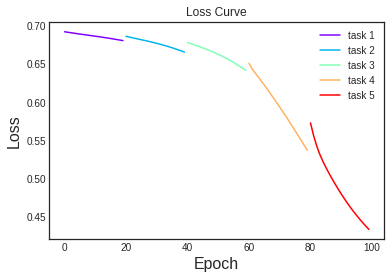

In [ ]:
loss_plot(loss)

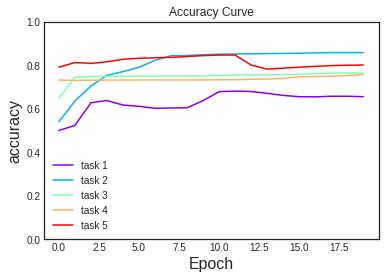

In [ ]:
accuracy_plot(train_acc)

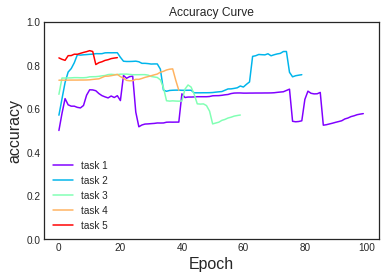

In [ ]:
accuracy_plot(test_acc)

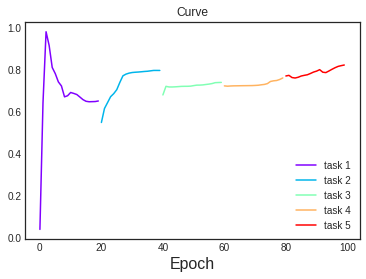

In [ ]:
metr_plot(pre)

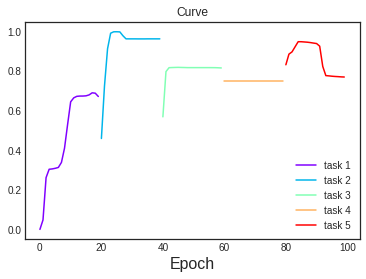

In [ ]:
metr_plot(recall)

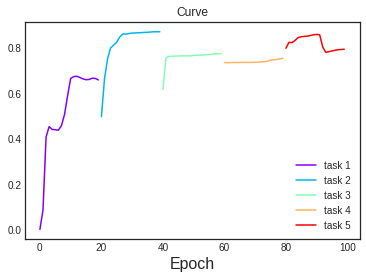

In [ ]:
metr_plot(f1)

In [ ]:
print(loss[4][19])
print(test_acc[4][19])
print(train_acc[4][19])
print(pre[4][19])
print(recall[4][19])
print(f1[4][19])

tensor(0.4332)
tensor(0.8355)
0.8018013535031847
0.8238335067182769
0.769120068220641
0.7942153554753844


###EWC process

In [ ]:
loss_ewc, train_acc_ewc, test_acc_ewc, pre_ewc, recall_ewc, f1_ewc = ewc_process(epochs, importance=1000, 
#                                 weight=weight
                               )

100%|██████████| 20/20 [01:20<00:00,  4.01s/it]


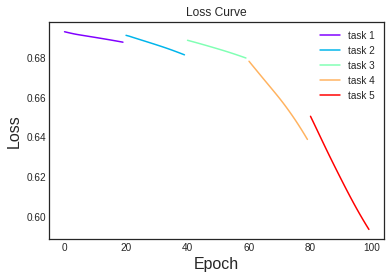

In [ ]:
loss_plot(loss_ewc)

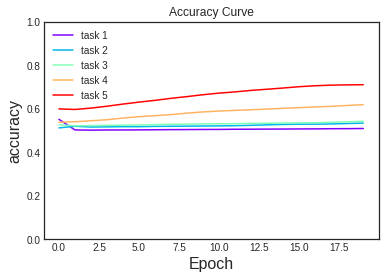

In [ ]:
accuracy_plot(train_acc_ewc)

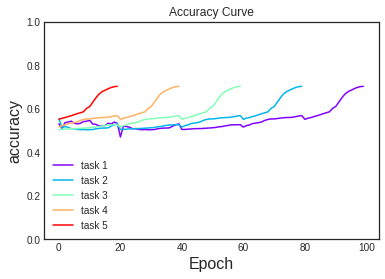

In [ ]:
accuracy_plot(test_acc_ewc)

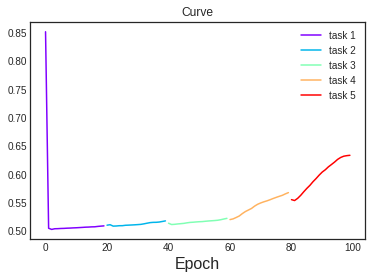

In [ ]:
metr_plot(pre_ewc)

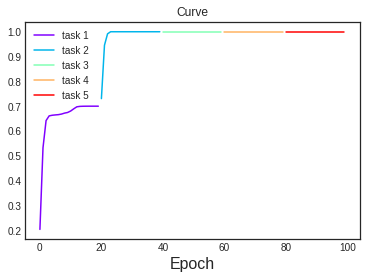

In [ ]:
metr_plot(recall_ewc)

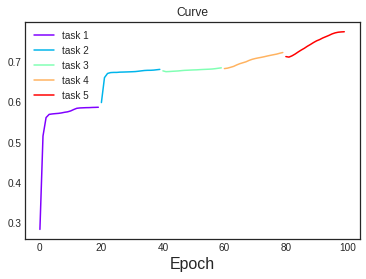

In [ ]:
metr_plot(f1_ewc)

In [ ]:
print(loss_ewc[4][19])
print(test_acc_ewc[4][19])
print(train_acc_ewc[4][19])
print(pre_ewc[4][19])
print(recall_ewc[4][19])
print(f1_ewc[4][19])

tensor(0.5934)
tensor(0.7035)
0.7109375
0.6336769934372652
1.0
0.7747427695740831


###GEM process

In [ ]:
loss_gem, train_acc_gem, test_acc_gem, pre_gem, recall_gem, f1_gem = gem_process(epochs, importance=1000, 
#                                 weight=weight
                               )

100%|██████████| 20/20 [00:55<00:00,  2.80s/it]


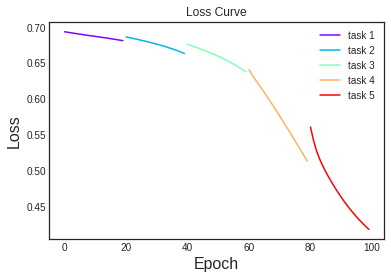

In [ ]:
loss_plot(loss_gem)

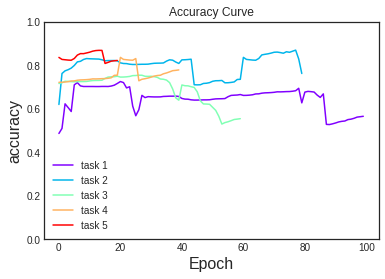

In [ ]:
accuracy_plot(test_acc_gem)

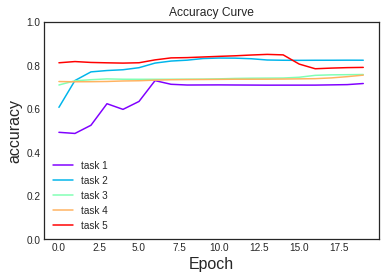

In [ ]:
accuracy_plot(train_acc_gem)

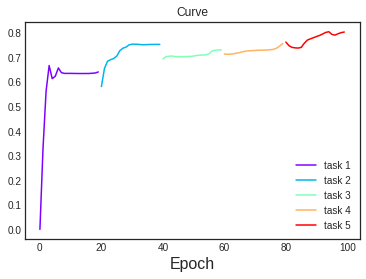

In [ ]:
metr_plot(pre_gem)

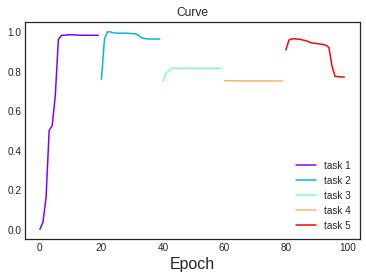

In [ ]:
metr_plot(recall_gem)

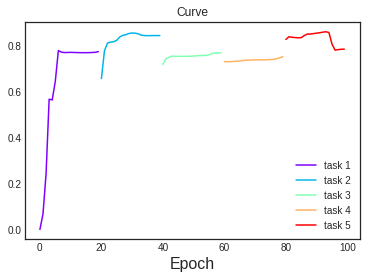

In [ ]:
metr_plot(f1_gem)

In [ ]:
print(loss_gem[4][19])
print(test_acc_gem[4][19])
print(train_acc_gem[4][19])
print(pre_gem[4][19])
print(recall_gem[4][19])
print(f1_gem[4][19])

tensor(0.4183)
tensor(0.8225)
0.7906050955414012
0.8039995856652279
0.7700025747579313
0.7852816553991072


##Class incremental setting

In [ ]:
num_task_cil = 24
epochs =  5
num_perm = 5

In [ ]:
def standard_process_cil(epochs, use_cuda=True, weight=True):
    model = MLP(hidden_size)
    if torch.cuda.is_available() and use_cuda:
        model.cuda()
    optimizer = optim.SGD(params=model.parameters(), lr=lr)

    loss, test_acc, train_acc, pre, recall, f1 = {}, {}, {}, {}, {}, {}
    for task in range(num_task_cil):
        loss[task] = []
        test_acc[task] = []
        train_acc[task] = []
        pre[task] = []
        recall[task] = []
        f1[task] = []
        for _ in tqdm(range(epochs)):
            temp_loss, acc, pre_temp, recall_temp, f1_temp = normal_train(model, optimizer, train_loader_cil[task])
            pre[task].append(pre_temp)
            recall[task].append(recall_temp)
            f1[task].append(f1_temp)
            loss[task].append(temp_loss)
            train_acc[task].append(acc)
            for sub_task in range(task + 1):
                test_acc[sub_task].append(test(model, test_loader_cil[sub_task]))
        if task == 0 and weight:
            weight = model.state_dict()
    return loss, train_acc, test_acc, weight, pre, recall, f1


def ewc_process_cil(epochs, importance, use_cuda=True, weight=None):
    model = MLP2(hidden_size)
    if torch.cuda.is_available() and use_cuda:
        model.cuda()
    optimizer = optim.SGD(params=model.parameters(), lr=lr)

    loss, test_acc, train_acc, pre, recall, f1 = {}, {}, {}, {}, {}, {}
    for task in range(num_task_cil):
        loss[task] = []
        test_acc[task] = []
        train_acc[task] = []
        pre[task] = []
        recall[task] = []
        f1[task] = []

        if task == 0:
            if weight:
                model.load_state_dict(weight)
            else:
                for _ in tqdm(range(epochs)):
                    temp_loss, acc, pre_temp, recall_temp, f1_temp = normal_train(model, optimizer, train_loader_cil[task])
                    #print(pre_temp,recall_temp,f1_temp,temp_loss,acc)
                    pre[task].append(pre_temp)
                    recall[task].append(recall_temp)
                    f1[task].append(f1_temp)
                    loss[task].append(temp_loss)
                    train_acc[task].append(acc)
                    test_acc[task].append(test(model, test_loader_cil[task]))
        else:
            tem_loss = 0
            old_tasks = []
            for sub_task in range(task):
                old_tasks = old_tasks + train_loader_cil[sub_task].dataset.get_sample(sample_size)
            old_tasks = random.sample(old_tasks, k=sample_size)
            for _ in tqdm(range(epochs)):
                temp_loss, acc, pre_temp, recall_temp, f1_temp = ewc_train(model, optimizer, train_loader_cil[task], EWC(model, old_tasks), importance)
                #print(pre_temp, recall_temp, f1_temp,temp_loss,acc)
                pre[task].append(pre_temp)
                recall[task].append(recall_temp)
                f1[task].append(f1_temp)
                loss[task].append(temp_loss)
                train_acc[task].append(acc)
                for sub_task in range(task + 1):
                    test_acc[sub_task].append(test(model, test_loader_cil[sub_task]))

    return loss, train_acc, test_acc, pre, recall, f1

def gem_process_cil(epochs, importance, use_cuda=True, weight=None):
    model = MLP3(hidden_size)
    if torch.cuda.is_available() and use_cuda:
        model.cuda()
    optimizer = optim.SGD(params=model.parameters(), lr=lr)
    sample_size = 200
    
    loss, test_acc, train_acc, pre, recall, f1 = {}, {}, {}, {}, {}, {}
    for task in range(num_task_cil):
        loss[task] = []
        test_acc[task] = []
        train_acc[task] = []
        pre[task] = []
        recall[task] = []
        f1[task] = []
        temp_loss = 0
        if task == 0:
            if weight:
                model.load_state_dict(weight)
            else:
                for _ in tqdm(range(epochs)):
                    temp_loss, acc, pre_temp, recall_temp, f1_temp = normal_train(model, optimizer, train_loader_cil[task])
                    #print(pre_temp,recall_temp,f1_temp,temp_loss,acc)
                    pre[task].append(pre_temp)
                    recall[task].append(recall_temp)
                    f1[task].append(f1_temp)
                    loss[task].append(temp_loss)
                    train_acc[task].append(acc)
                    test_acc[task].append(test(model, test_loader_cil[task]))
        else:
            old_tasks = []
            for sub_task in range(task):
                old_tasks = old_tasks + train_loader_cil[sub_task].dataset.get_sample(sample_size)
            old_tasks = random.sample(old_tasks, k=sample_size)
            for _ in tqdm(range(epochs)):
                temp_loss, acc, pre_temp, recall_temp, f1_temp  = gem_train(model, optimizer, train_loader_cil[task],old_tasks, loss)
                #print(pre_temp, recall_temp, f1_temp,temp_loss,acc)
                pre[task].append(pre_temp)
                recall[task].append(recall_temp)
                f1[task].append(f1_temp)
                loss[task].append(temp_loss)
                train_acc[task].append(acc)
                for sub_task in range(task + 1):
                    test_acc[sub_task].append(test(model, test_loader_cil[sub_task]))

    return loss, train_acc, test_acc, pre, recall, f1

In [ ]:
from matplotlib.pyplot import cm
import numpy as np
def loss_plot_cil(x):
    c = []
    color = iter(cm.rainbow(np.linspace(0, 1, 24)))
    for i in range(24):
      c.append(next(color))
    for t, v in x.items():
        plt.title('Loss Curve')
        plt.ylabel('Loss', fontsize=16)
        plt.xlabel('Epoch', fontsize=16)
        #plt.plot(v)
        plt.plot(list(range(t * epochs, (t + 1) * epochs)), v, c = c[t])

def accuracy_plot_cil(tr):
    c = []
    color = iter(cm.rainbow(np.linspace(0, 1, 24)))
    for i in range(24):
      c.append(next(color))
    plt.title('Accuracy Curve')
    plt.ylabel('accuracy', fontsize=16)
    plt.xlabel('Epoch', fontsize=16)
    for id,val in tr.items():
      plt.plot(val,c = c[id])  
    plt.ylim(0, 1)
def metr_plot_cil(x):
    c = []
    color = iter(cm.rainbow(np.linspace(0, 1, 24)))
    for i in range(24):
      c.append(next(color))
    for t, v in x.items():
        plt.title('Curve')
        #plt.ylabel('', fontsize=16)
        plt.xlabel('Epoch', fontsize=16)
        #plt.plot(v)
        plt.plot(list(range(t * epochs, (t + 1) * epochs)), v, c = c[t])
   

In [ ]:
model = MLP()
model.eval()

MLP(
  (fc1): Linear(in_features=70, out_features=250, bias=True)
  (fc2): Linear(in_features=250, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=250, bias=True)
  (fc4): Linear(in_features=250, out_features=2, bias=True)
)

###Standard method

In [ ]:
loss_cil,  train_acc_cil, test_acc_cil, weight_cil, pre_cil, recall_cil, f1_cil = standard_process_cil(epochs)

100%|██████████| 5/5 [01:03<00:00, 12.78s/it]


In [ ]:
print(len(loss_cil[0]))

5


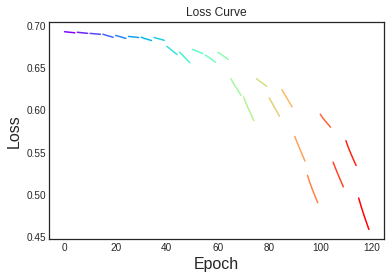

In [ ]:
loss_plot_cil(loss_cil)

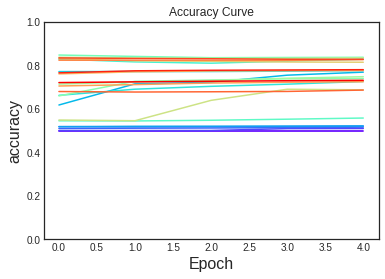

In [ ]:
accuracy_plot_cil(train_acc_cil)

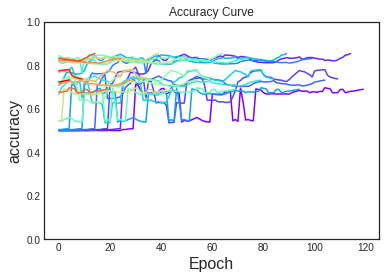

In [ ]:
accuracy_plot_cil(test_acc_cil)

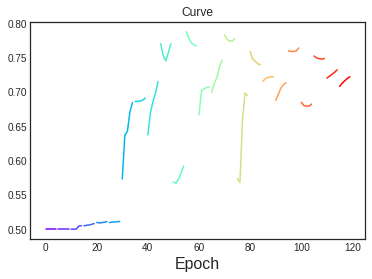

In [ ]:
metr_plot_cil(pre_cil)

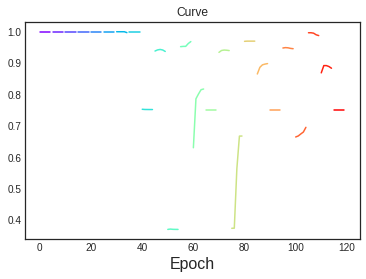

In [ ]:
metr_plot_cil(recall_cil)

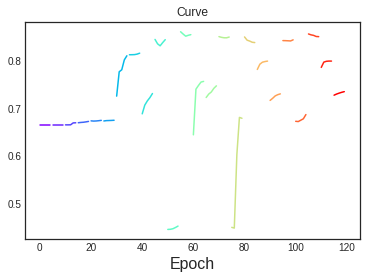

In [ ]:
metr_plot_cil(f1_cil)

In [ ]:
print(loss_cil[23][4])
print(test_acc_cil[23][4])
print(train_acc_cil[23][4])
print(pre_cil[23][4])
print(recall_cil[23][4])
print(f1_cil[23][4])

tensor(0.4584)
tensor(0.7320)
0.7311902866242038
0.7221141614857205
0.7520539239562651
0.7352965148661058


###EWC method

In [ ]:
loss_ewc_cil, train_acc_ewc_cil, test_acc_ewc_cil, pre_ewc_cil, recall_ewc_cil, f1_ewc_cil = ewc_process_cil(epochs, importance=1000, 
#                                 weight=weight
                               )

100%|██████████| 5/5 [01:07<00:00, 13.49s/it]


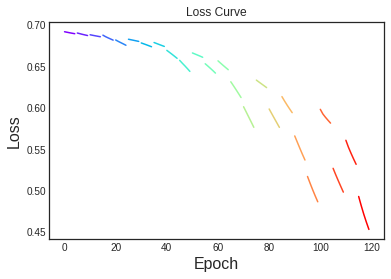

In [ ]:
loss_plot_cil(loss_ewc_cil)

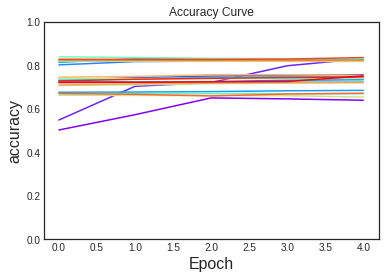

In [ ]:
accuracy_plot_cil(train_acc_ewc_cil)

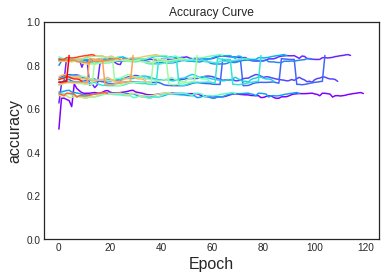

In [ ]:
accuracy_plot_cil(test_acc_ewc_cil)

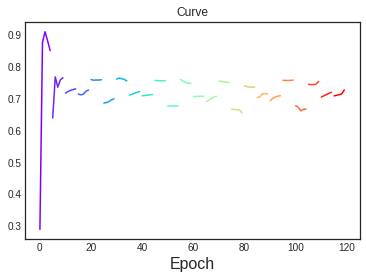

In [ ]:
metr_plot_cil(pre_ewc_cil)

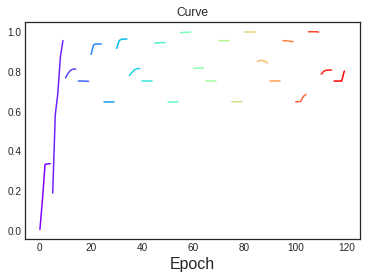

In [ ]:
metr_plot_cil(recall_ewc_cil)

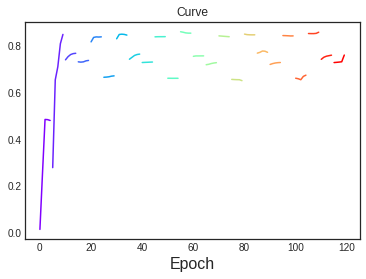

In [ ]:
metr_plot_cil(f1_ewc_cil)

In [ ]:
print(loss_ewc_cil[23][4])
print(test_acc_ewc_cil[23][4])
print(train_acc_ewc_cil[23][4])
print(pre_ewc_cil[23][4])
print(recall_ewc_cil[23][4])
print(f1_ewc_cil[23][4])

tensor(0.4532)
tensor(0.8454)
0.751343550955414
0.7270993182639541
0.8021142095297566
0.7601214384020771


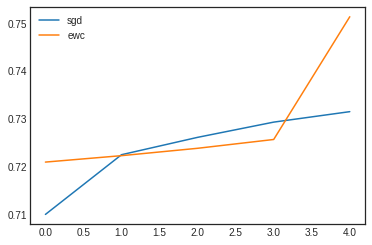

In [ ]:
plt.plot(train_acc_cil[23], label="sgd")
plt.plot(train_acc_ewc_cil[23], label="ewc")
plt.legend()

###GEM method

In [ ]:
loss_gem_cil, train_acc_gem_cil, test_acc_gem_cil, pre_gem_cil, recall_gem_cil, f1_gem_cil = gem_process_cil(epochs, importance=1000, 
#                                 weight=weight
                               )

100%|██████████| 5/5 [01:05<00:00, 13.01s/it]


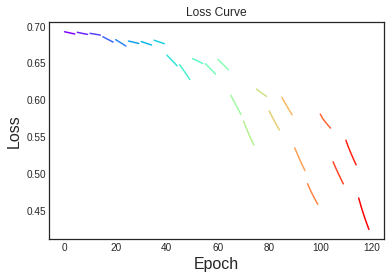

In [ ]:
loss_plot_cil(loss_gem_cil)

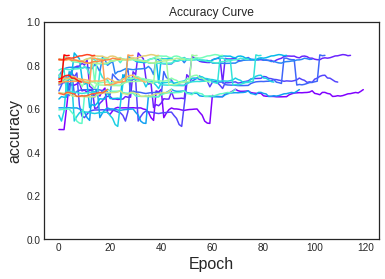

In [ ]:
accuracy_plot_cil(test_acc_gem_cil)

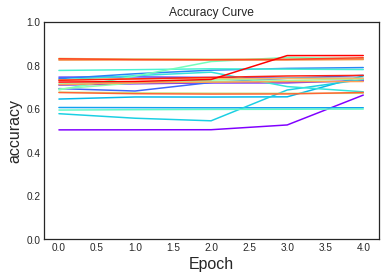

In [ ]:
accuracy_plot_cil(train_acc_gem_cil)

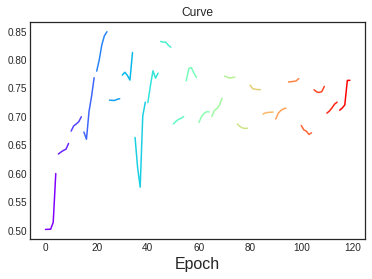

In [ ]:
metr_plot_cil(pre_gem_cil)

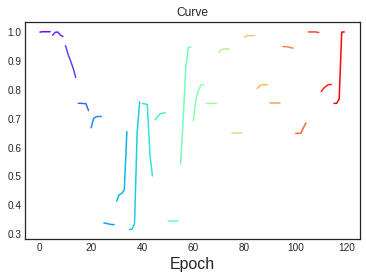

In [ ]:
metr_plot_cil(recall_gem_cil)

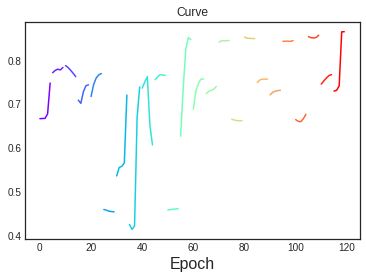

In [ ]:
metr_plot_cil(f1_gem_cil)

In [ ]:
print(loss_gem_cil[23][4])
print(test_acc_gem_cil[23][4])
print(train_acc_gem_cil[23][4])
print(pre_gem_cil[23][4])
print(recall_gem_cil[23][4])
print(f1_gem_cil[23][4])

tensor(0.4249)
tensor(0.8458)
0.845093550955414
0.7637450289316547
0.9992184065645311
0.8650974096358752


#Inference:

We can infer from the results of CIL and DIL setting that continual laearning methods i.e EWC and GEM perform better than the standard method with the continual learning methods reaching a recall of almost 0.99 in some instances.

We can also infer that the CIL shows better results due to it having more amounts of data to train on and the way the data is arranged.

GEM shows higher precision and and f1 score and reaches higher recall faster than ewc.

Therefore GEM seems to be a better model on the CICIDS dataset.

